In [1]:
print("pipeline and dimentionality reduction tut")

pipeline and dimentionality reduction tut


In [2]:
import numpy as np
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
train = pd.read_csv('./train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape)

(42000, 785)


In [5]:
target = train['label']
train = train.drop("label", axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X = train.values
X_std = StandardScaler().fit_transform(X)

/Users/soichi/.pyenv/versions/spark-env/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [8]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [9]:
eig_pairs.sort(key = lambda x: x[0], reverse = True)

In [10]:
tot = sum(eig_vals)
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [11]:
trace1 = go.Scatter(
    x = list(range(784)),
    y = cum_var_exp,
    mode = 'lines+markers',
    name = "'Cumulative explained variance'",
    hoverinfo = cum_var_exp,
    line = dict(
        shape = 'spline',
        color = 'goldenrod'
    )
)

trace2 = go.Scatter(
    x = list(range(784)),
    y = var_exp,
    mode = 'lines+markers',
    name = "'Individual explained variance'",
    hoverinfo = var_exp,
    line = dict(
        shape = 'linear',
        color = 'black'
    )
)

fig = tls.make_subplots(insets=[{'cell': (1,1), 'l':0.7, 'b':0.5}],
                       print_grid=True)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.layout.title = 'explained variance plots - full and zoomed in'
fig.layout.xaxis = dict(range=[0,80], title='feature columns')
fig.layout.yaxis = dict(range=[0,60], title='explained variance')
fig['data'] += [go.Scatter(x=list(range(784)), y=cum_var_exp, xaxis='x2', yaxis='y2', name = 'cumulative explained variance')]
fig['data'] += [go.Scatter(x=list(range(784)), y=var_exp, xaxis='x2', yaxis='y2', name = 'individual explained variance')]
py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



In [12]:
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)

In [13]:
eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_

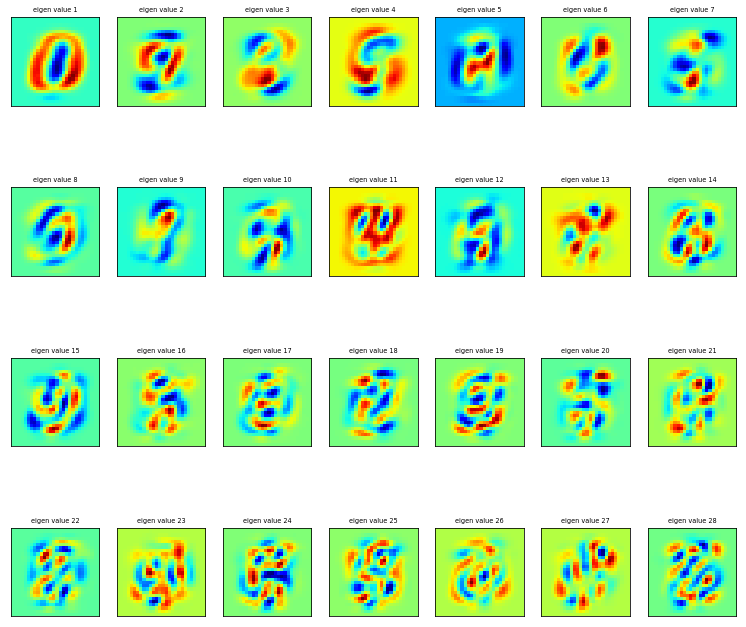

In [14]:
n_row = 4
n_col = 7

plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset = 0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'eigen value '  + str(i+1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

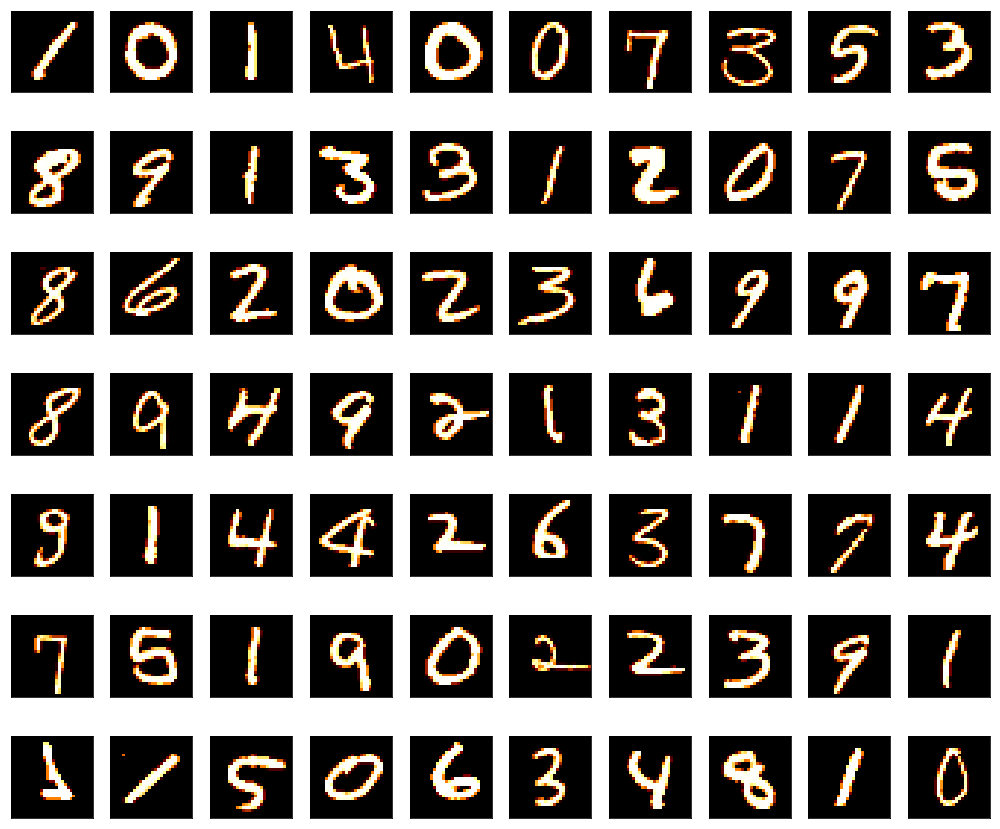

In [17]:
plt.figure(figsize=(14,12))
for digit_num in range(0, 70):
    plt.subplot(7,10,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [18]:
del X

In [19]:
X = train[:6000].values
del train
X_std = StandardScaler().fit_transform(X)

/Users/soichi/.pyenv/versions/spark-env/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [23]:
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

In [26]:
X_5d.shape

(6000, 5)

In [24]:
Target = target[:6000]

In [25]:
trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
    name = Target,
    hoveron = Target,
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [24]:
import numpy as np
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [25]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
print('Number of data ={0}, Dimention = {1}'.format(X.shape[0], X.shape[1]))

Number of data =1797, Dimention = 64


In [32]:
p = np.random.randint(0, len(digits.data), 25)

In [44]:
for index in enumerate(np.array(zip(digits.data, digits.target))[p]):
    print(index)

IndexError: too many indices for array

In [ ]:
print("kindle pos 3309")

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [6]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])